In [1]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
shirts = np.load('/Users/ash/Downloads/shirts.data')
jerseys = np.load('/Users/ash/Downloads/jerseys.data')


data = np.concatenate((shirts,jerseys), axis=0)
data = data/255
data = data.reshape(data.shape[0], 200*200,3)
label = np.zeros(shape=(data.shape[0], 1))
label[:shirts.shape[0],:] = 1
print(data.shape)

In [3]:
lda = LinearDiscriminantAnalysis() 
new =lda.fit_transform(data, label)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [4]:
lda.score(data, label)

0.9953488372093023

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


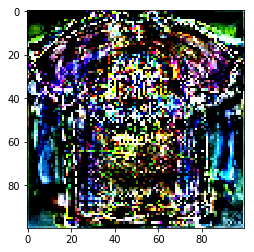

In [6]:
import matplotlib.pyplot as plt
plt.imshow(lda.coef_.reshape(100,100,3))

plt.show()

In [12]:
lda_r, lda_b, lda_g = LinearDiscriminantAnalysis(), LinearDiscriminantAnalysis(), LinearDiscriminantAnalysis() 
lda_r.fit(data[:,:,0], label)
lda_g.fit(data[:,:,1], label)
lda_b.fit(data[:,:,2], label)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

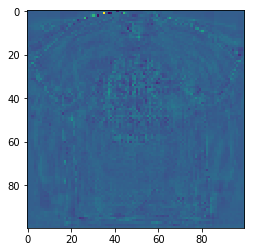

In [13]:
plt.imshow(lda_r.coef_[0].reshape(100,100))
plt.imshow(lda_g.coef_[0].reshape(100,100))
plt.imshow(lda_b.coef_[0].reshape(100,100))
plt.show()

In [5]:
decomposer_r = PCA(n_components=100)
decomposer_r.fit(data[:,:,0])
print(sum(decomposer_r.explained_variance_ratio_))

0.960156701383862


In [6]:
decomposer_g = PCA(n_components=100)
decomposer_g.fit(data[:,:,1])
print(sum(decomposer_g.explained_variance_ratio_))

0.9567201755537359


In [7]:
decomposer_b = PCA(n_components=100)
decomposer_b.fit(data[:,:,2])
print(sum(decomposer_b.explained_variance_ratio_))

0.9620350453293042


In [66]:
reduced_r = decomposer_r.transform(data[:,:,0])
reduced_g = decomposer_b.transform(data[:,:,1])
reduced_b = decomposer_r.transform(data[:,:,2])

reduced_data = np.zeros(shape=(215, 100, 3))
reduced_data[:, :, 0] = reduced_r 
reduced_data[:, :, 1] = reduced_g
reduced_data[:, :, 2] = reduced_b

print(reduced_data.shape)

(215, 100, 3)


<IPython.core.display.Javascript object>


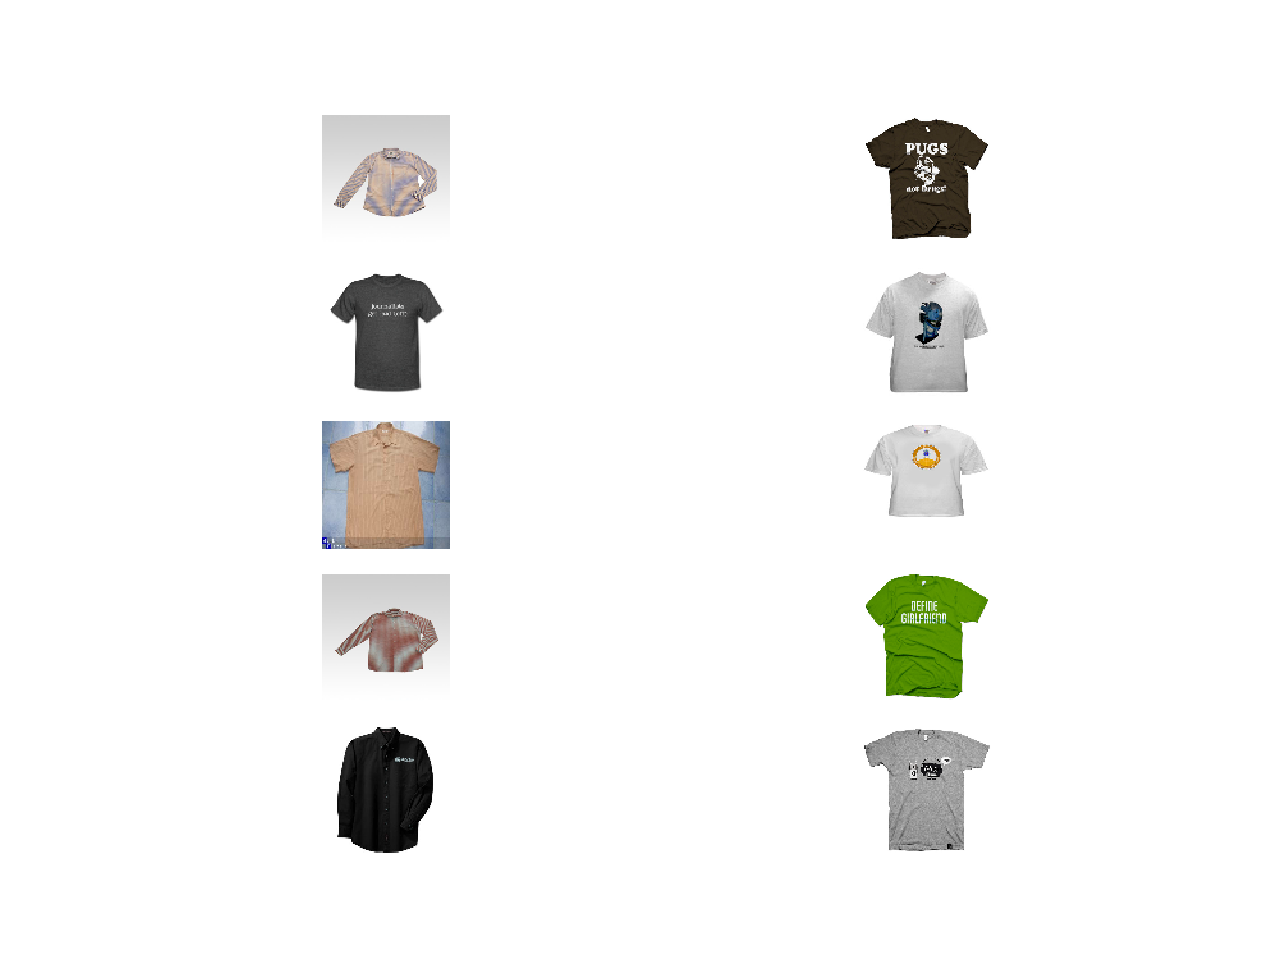

In [8]:
% matplotlib notebook
import matplotlib.pyplot as plt

choices = np.random.choice(215, size=10)


count_1=1
for _ in choices: 
    plt.subplot(5,2,count_1)
    plt.imshow(data[_].reshape(100,100,3))
    plt.axis('off')
    count_1 +=1
    
plt.show()

<IPython.core.display.Javascript object>


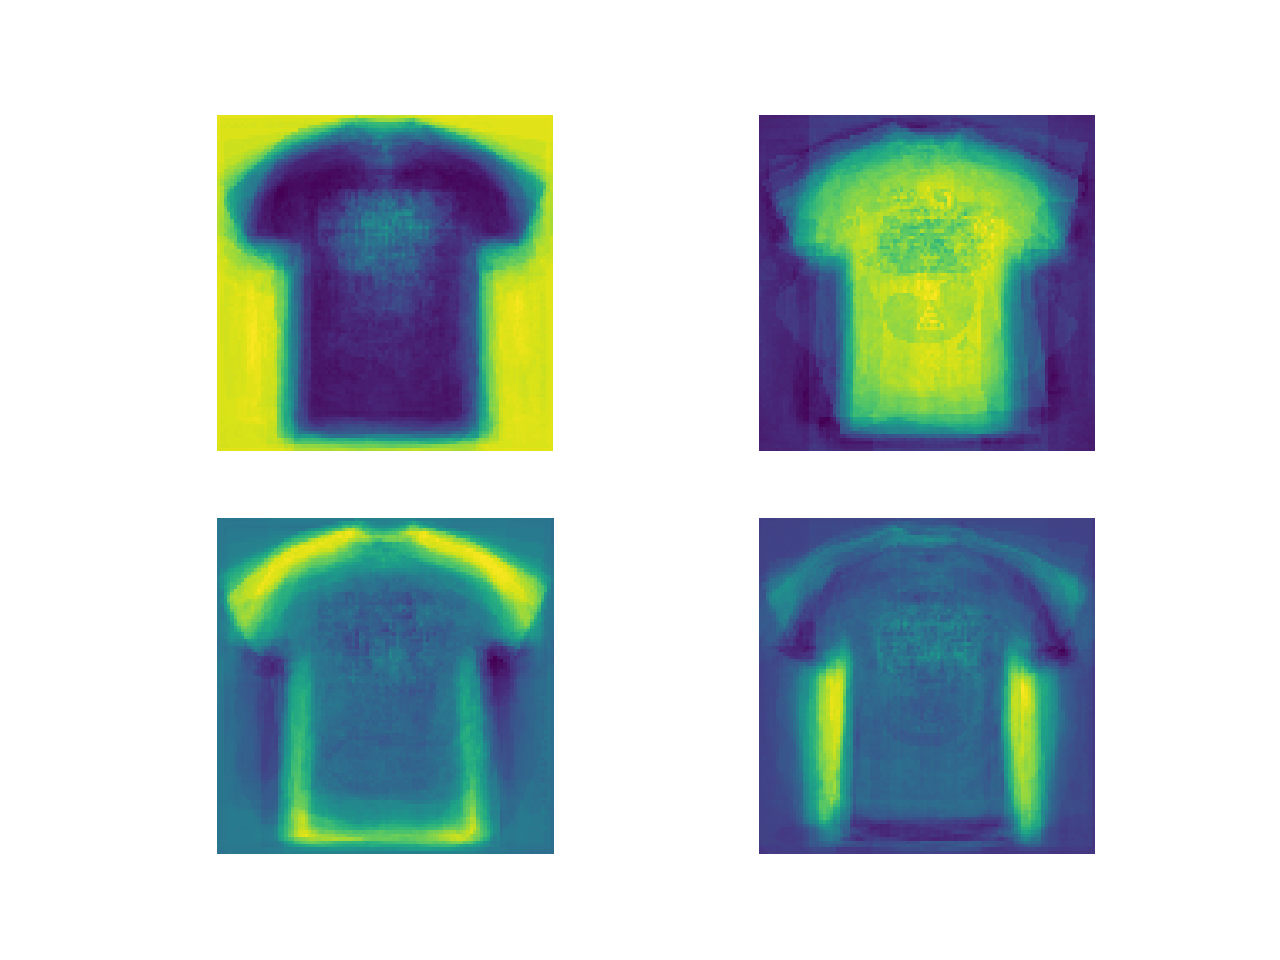

In [81]:
count = 1
for _ in range(4): 
    plt.subplot(2,2,count)
    plt.imshow(decomposer_r.components_[_].reshape(100,100))
    plt.imshow(decomposer_g.components_[_].reshape(100,100))
    plt.imshow(decomposer_b.components_[_].reshape(100,100))
    plt.axis('off')
    count+=1
plt.show()

<IPython.core.display.Javascript object>


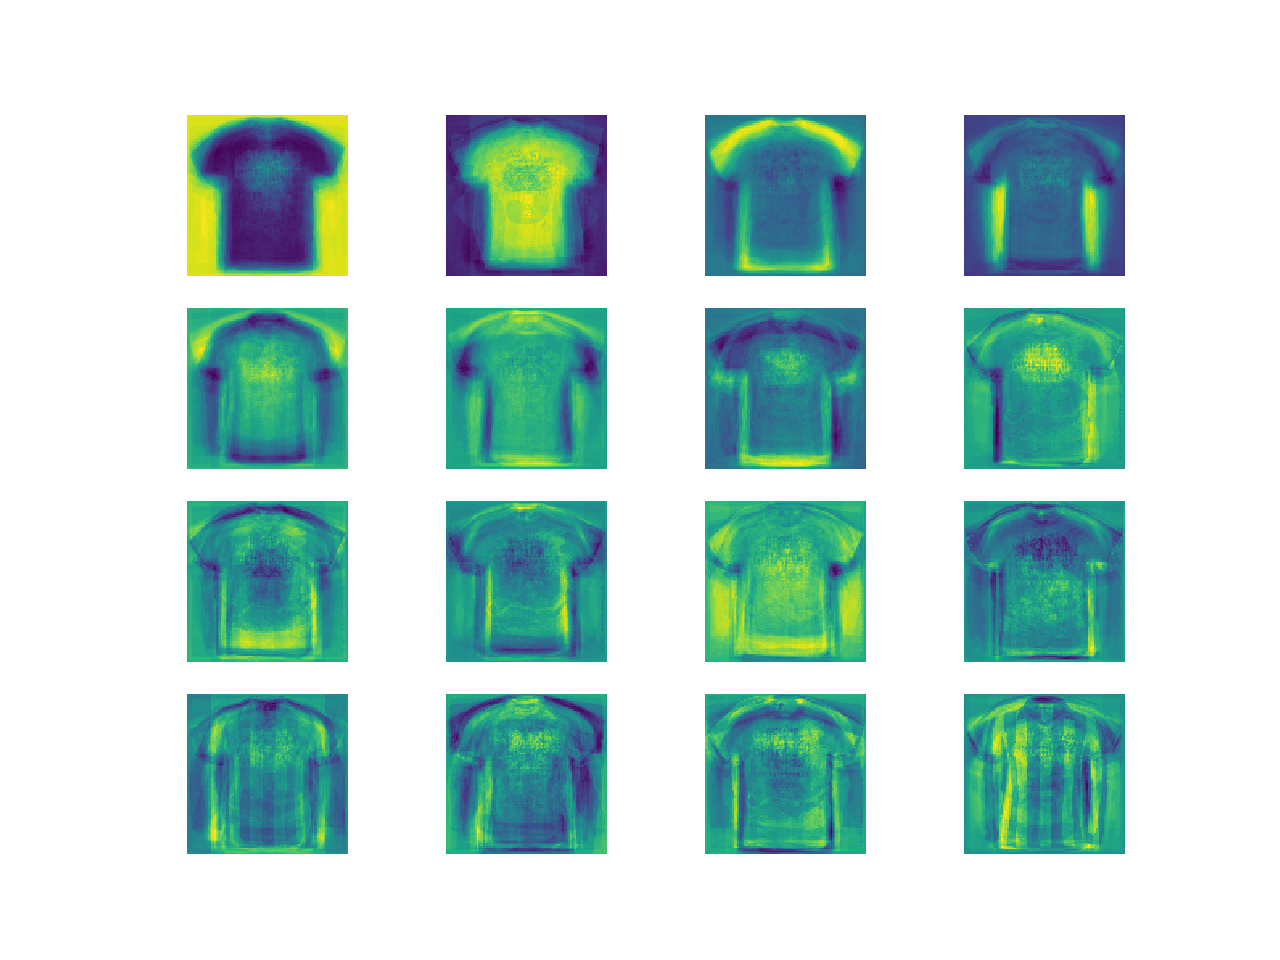

In [9]:
count = 1
for _ in range(16): 
    plt.subplot(4,4,count)
    plt.imshow(decomposer_r.components_[_].reshape(100,100))
    plt.imshow(decomposer_g.components_[_].reshape(100,100))
    plt.imshow(decomposer_b.components_[_].reshape(100,100))
    plt.axis('off')
    count+=1
plt.show()

<IPython.core.display.Javascript object>


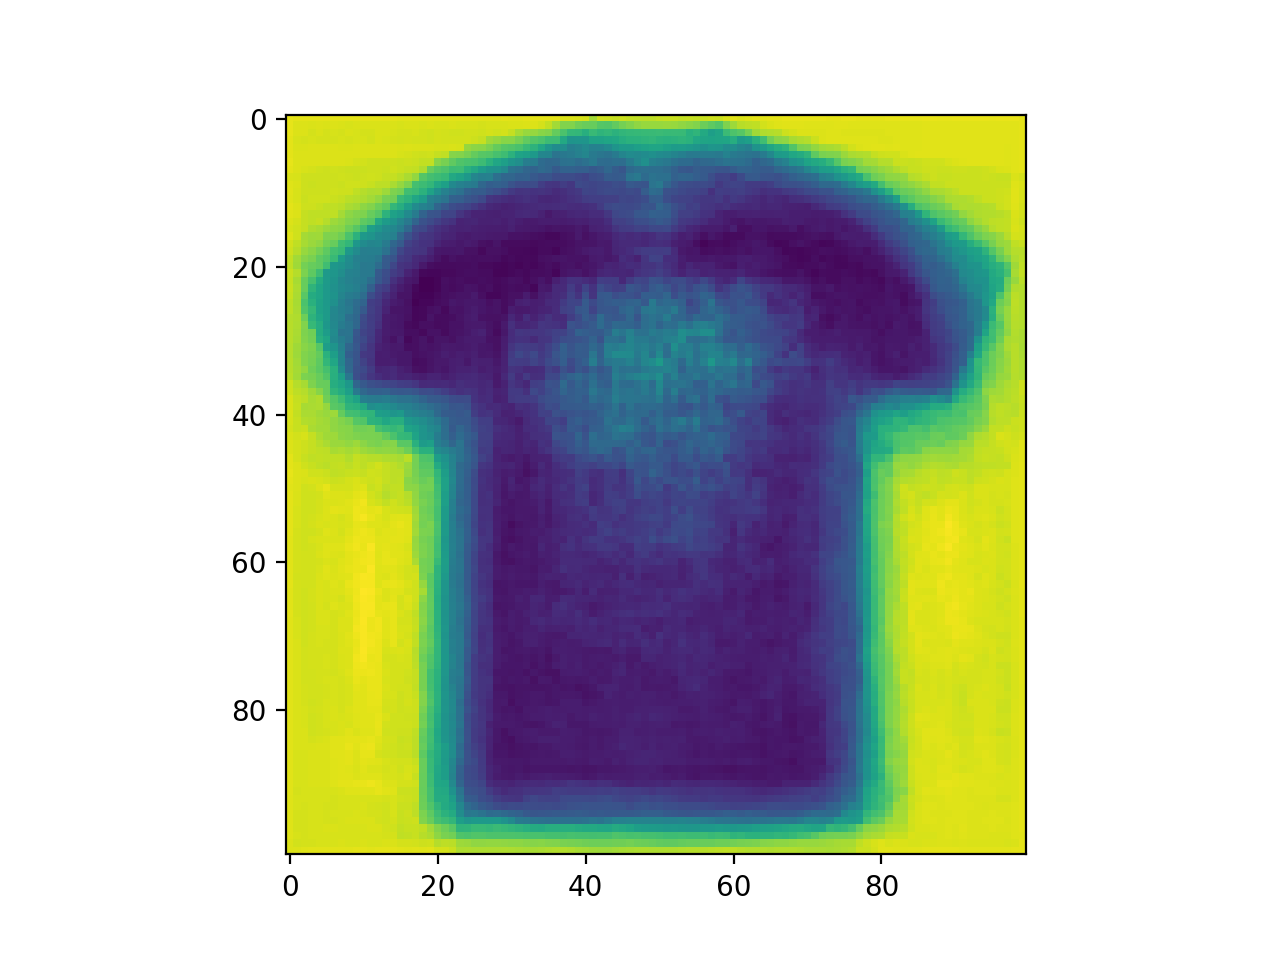

In [77]:
plt.imshow(decomposer_r.components_[0].reshape(100,100))
plt.imshow(decomposer_g.components_[0].reshape(100,100))
plt.imshow(decomposer_b.components_[0].reshape(100,100))
plt.show()

In [ ]:
import cv2
import glob
import numpy as np

path_s = '/Users/ash/Downloads/s_choice/*JPEG'
path_j = '/Users/ash/Downloads/j_choice/*JPEG'

files_s = glob.glob(path_s)
files_j = glob.glob(path_j)

shirts, jerseys = np.zeros(shape=(106, 100*100*3)), np.zeros(shape=(109, 100*100*3))

count_s = 0
for _ in files_s:
    img = cv2.imread(_)
    dim = (100,100)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    resized = resized.reshape(1, 100*100*3)
    shirts[count_s,:] = resized
    count_s +=1


count_j = 0
for _ in files_j:
    img = cv2.imread(_)
    dim = (100,100)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    resized = resized.reshape(1, 100*100*3)
    jerseys[count_j,:] = resized
    count_j +=1


shirts.dump('/Users/ash/Downloads/shirts.data')
jerseys.dump('/Users/ash/Downloads/jerseys.data')